<h1><center><b> DA&V (LAB_4), Image preprocessing </b></center></h1>

***INSTRUCTIONS*** <br>
You all are required to perform the required tasks for image data. You can do all tasks using opencv library except the ones where you are bound not to use library.

The data to perform this lab can be downloaded online or you can use the given image, use them according to the task.

<br>
<h1><center>GOOD LUCK, Happy Labbing </center></h1>

### Task.1 Read Image and show the output

In [1]:
!pip install opencv-python

In [14]:
# Importing all the necessary Libraries
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from skimage.util import random_noise
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Fetching the photo using the link
!wget https://e0.pxfuel.com/wallpapers/149/903/desktop-wallpaper-times-square-extensive-graphs-of-cities-for-android-new-york-united-states-manhattan-new-york-time-square.jpg -O /content/img.jpg

--2023-09-22 06:52:12--  https://e0.pxfuel.com/wallpapers/149/903/desktop-wallpaper-times-square-extensive-graphs-of-cities-for-android-new-york-united-states-manhattan-new-york-time-square.jpg
Resolving e0.pxfuel.com (e0.pxfuel.com)... 104.21.90.14, 172.67.193.79, 2606:4700:3032::ac43:c14f, ...
Connecting to e0.pxfuel.com (e0.pxfuel.com)|104.21.90.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171109 (167K) [image/jpeg]
Saving to: ‘/content/img.jpg’

/content/img.jpg    100%[===================>] 167.10K  --.-KB/s    in 0.03s   

2023-09-22 06:52:12 (5.05 MB/s) - ‘/content/img.jpg’ saved [171109/171109]



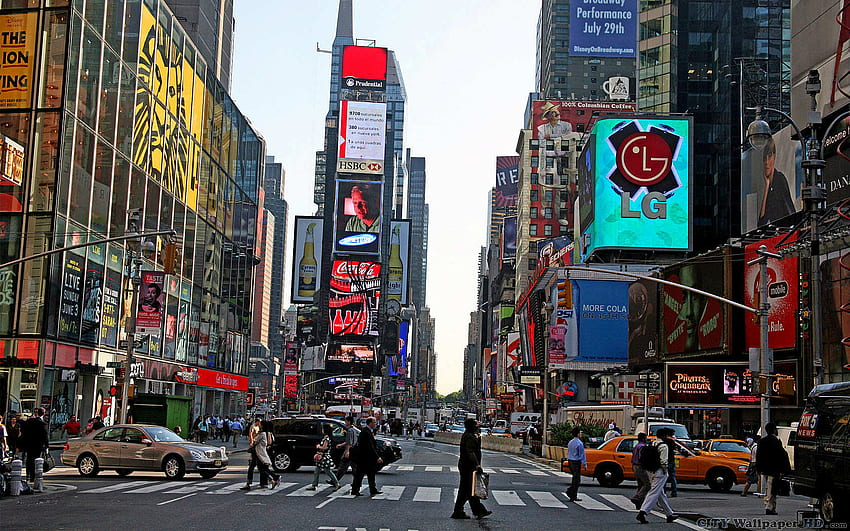

In [4]:
img = cv2.imread('img.jpg')
cv2_imshow(img)

### Task.2 Change the image into greyscale
1. Do this by library
2. Do it without library

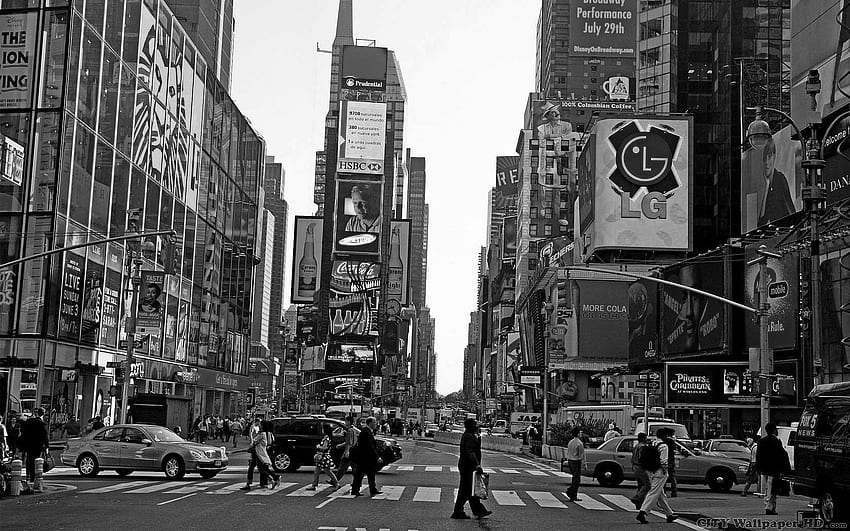

In [5]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

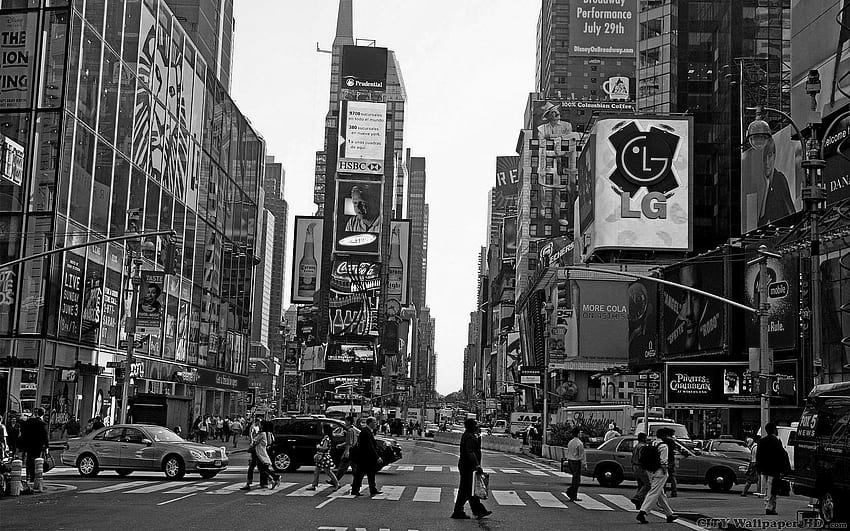

In [6]:
def rgb2gray(image):
  r,g,b = image[:,:,0],image[:,:,1],image[:,:,2]
  gray_image = 0.29*r+0.5870*g+0.1140 * b
  return gray_image


custom_grayscale_img = rgb2gray(img)
cv2_imshow(custom_grayscale_img)

### Task.3 Add noise to an image.

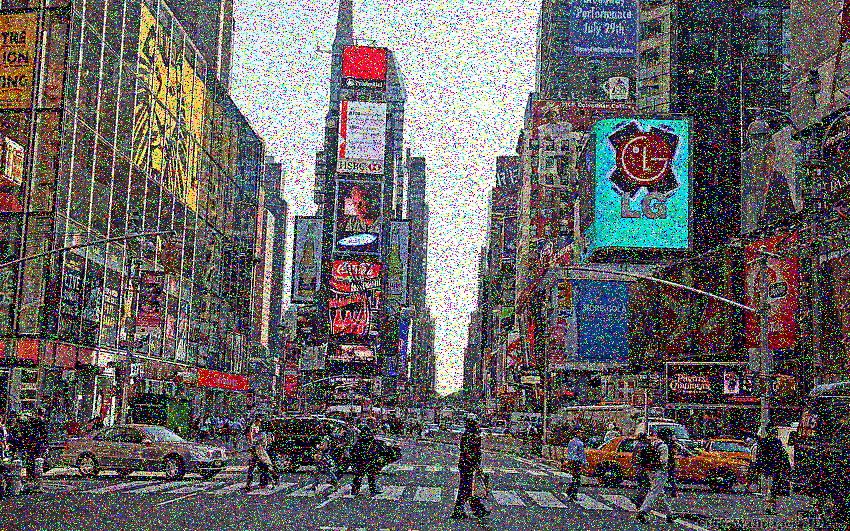

In [7]:
noise_img = random_noise(img, mode='s&p',amount=0.2)
noise_img = np.array(255*noise_img, dtype = 'uint8')

cv2_imshow(noise_img)

### Task.4 Image Enhancement
1. Color correction (Correct color cast)
2. Noise Reduction (Remove noise)
3. Enhance using (brigthness and contrast)

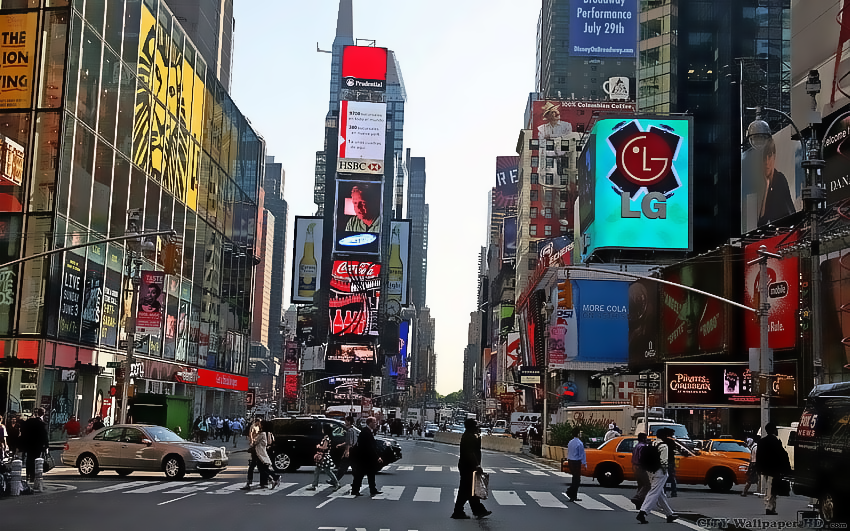

In [8]:
# Colour Correction
filtered = cv2.bilateralFilter(img, 15, 75, 75)
cv2_imshow(filtered)

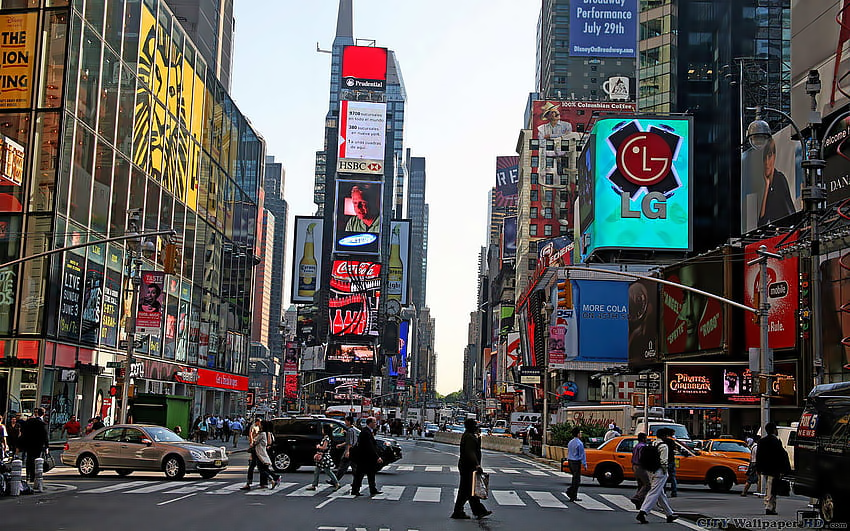

In [9]:
# Noise Reduction
denoised_img = cv2.fastNlMeansDenoising(img, None, 10, 10, 7)
cv2_imshow(denoised_img)

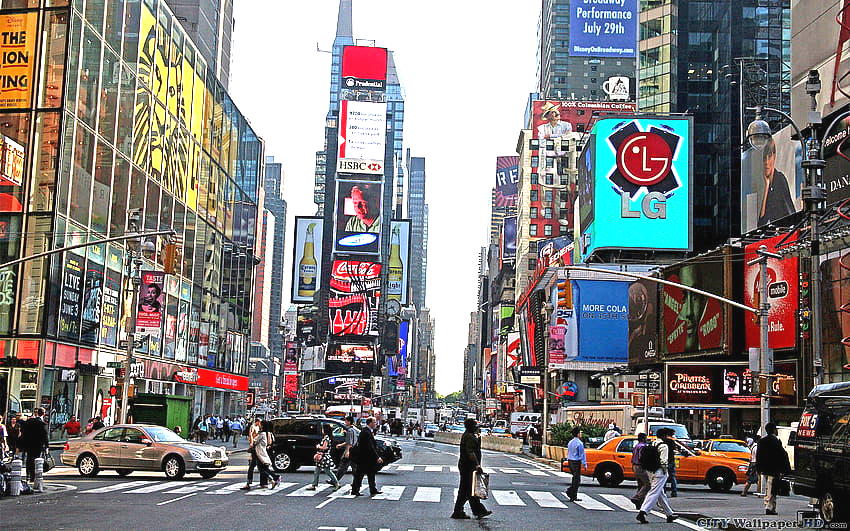

In [10]:
# Enhancement ( Brightness & Contrast )
alpha = 1.5 # Contrast control
beta = 10 # Brightness control

adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
cv2_imshow(adjusted)

Image compression, compress the image and show original and compressed image as output.

In [ ]:
encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), 90]
result, encimg = cv2.imencode('.jpg', img, encode_param)

cv2_imshow(encimg)

Perform feature extraction by edge detection

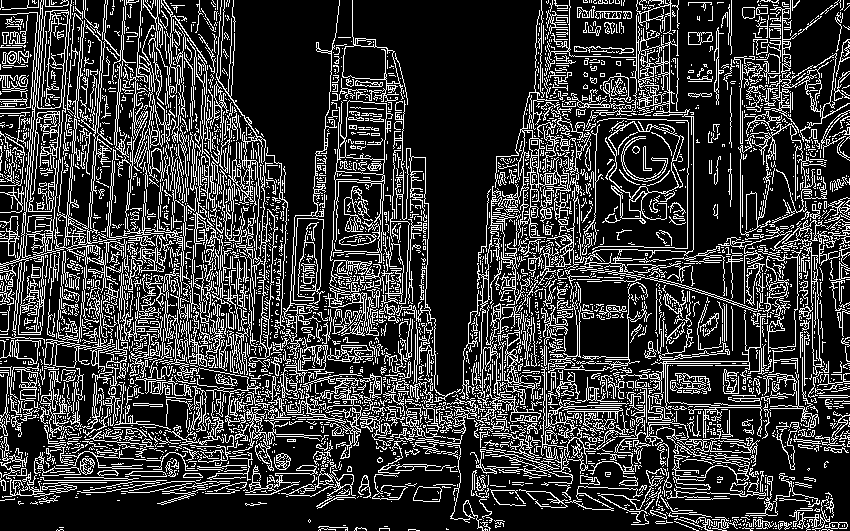

In [12]:
edges = cv2.Canny(image=img, threshold1=100, threshold2=200)
cv2_imshow(edges)

Perform image segmentation using opencv threshold

Perform the Morphing techniques to smooth transition & interpolation between 2 images.

- PS: for this its better to use images of same dimension, otherwise resize to prevent from error.

Show the histogram of an image.
1. Greyscale Image
2. RGB Image

Output should contain Image and Histogram (e.g, RBG Image with RGB Histogram and same for Greyscale)

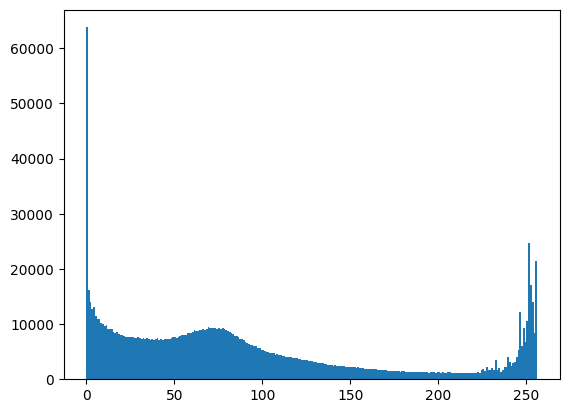

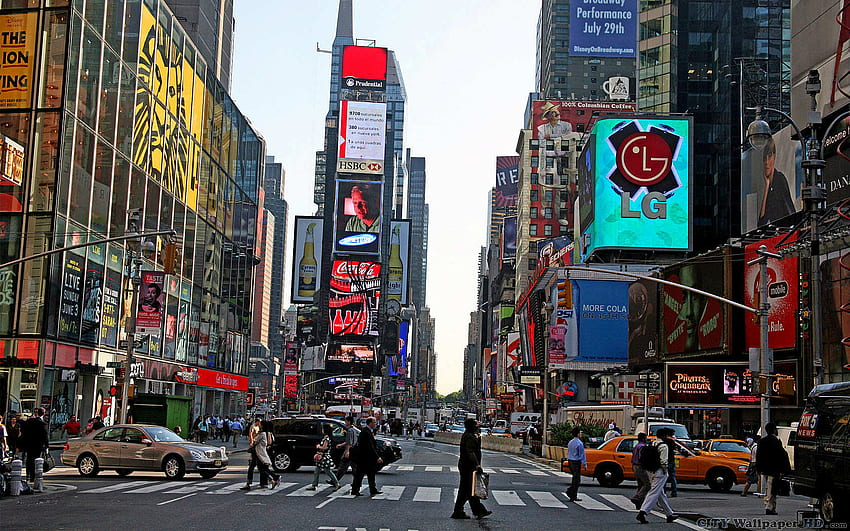

In [17]:
# RGB Image with histogram
plt.hist(img.ravel(),256,[0,256])
plt.show()
cv2_imshow(img)

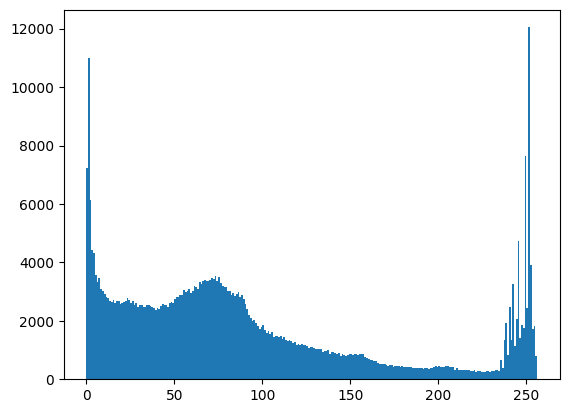

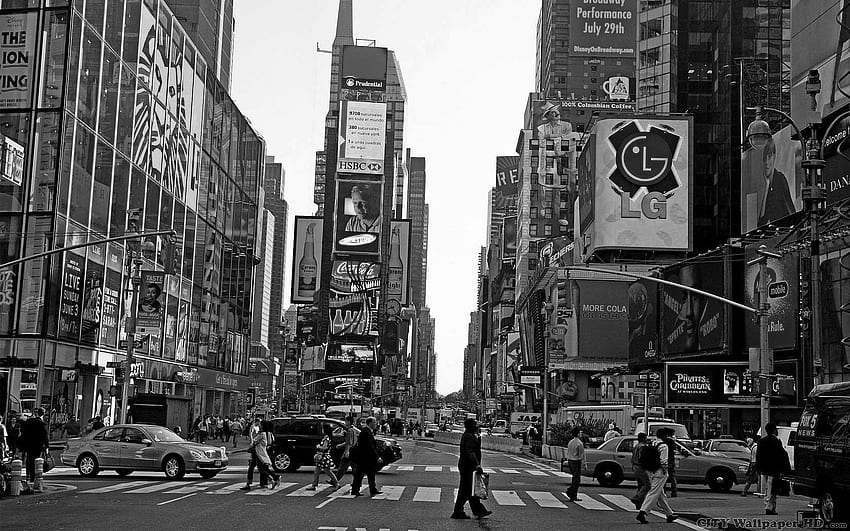

In [18]:
# GrayScale Image with Histogram
plt.hist(gray_image.ravel(),256,[0,256])
plt.show()
cv2_imshow(gray_image)

Normalize the Histogram mean perform Histogram Equalization (another technique for image enhancement)

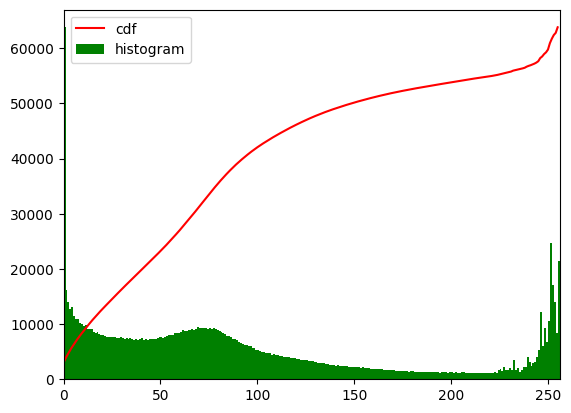

In [24]:
hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'r')
plt.hist(img.flatten(),256,[0,256], color = 'g')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()